## Evelyn Komalasari Hartono
### 0706022310001

### Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [ ]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
data = pd.read_csv(url)
data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
# describe data
data.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
# Check for info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


From 225 entries. It seems like there's 1 null value located on the Other Names. 

In [ ]:
data[data.isnull().any(axis=1)]


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


After checked, seems like other names serve the same purpose as country and has no significant reason to be maintained. We'll remove it instead. 

In [ ]:
data = data.drop('Other names', axis=1)

In [ ]:
df = data.copy()

### Explanatory Data Analysis

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Total Cases", 
    hover_name="Country",
    hover_data=["Continent", "Total Cases", "Population"],
    projection="natural earth",
    title="COVID-19 Total Cases by Country",
    color_continuous_scale="Reds"
)

fig.show()

Here's a visualization regarding the total case of covid 19 in those countries. Whereas the redder the color, the more exposed the country is to covid 19. 

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color= "Continent",
    hover_name= "Country",
    projection="natural earth",
    title= "World Map of Countries by Continent"
)

fig.show()

Before it was the total case on each country. This visualization shows us the different areas of the contries mapped by their continent. So we could see different colors based on the assigned continent of each of the represantable colors.

In [ ]:
df = df.drop('ISO 3166-1 alpha-3 CODE', axis=1)

### Encoding & Transformation

In [ ]:
print(df.columns.tolist())

['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Population',
       'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop',
       'Death percentage']

df_scaled = df.copy()

sc = StandardScaler()
df_scaled[numeric_cols] = sc.fit_transform(df[numeric_cols])

df_scaled.head()

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,0.038789,Asia,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,Albania,-0.231774,Europe,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,Algeria,0.073154,Africa,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,Andorra,-0.251891,Europe,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,Angola,-0.003016,Africa,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [ ]:
df_scaled = df_scaled.drop(['Country', 'Continent'], axis=1)

### Clustering

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

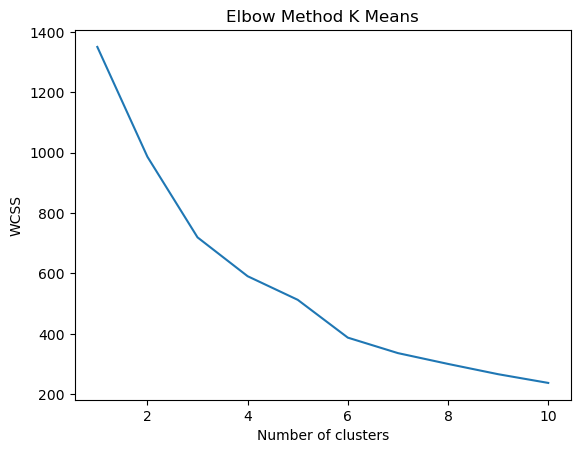

In [ ]:
# K MEANS

wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method K Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1350.000000
1                   2   986.275197
2                   3   719.392113
3                   4   590.767889
4                   5   512.606000
5                   6   387.372350
6                   7   336.140483
7                   8   300.324806
8                   9   266.300500
9                  10   237.420010


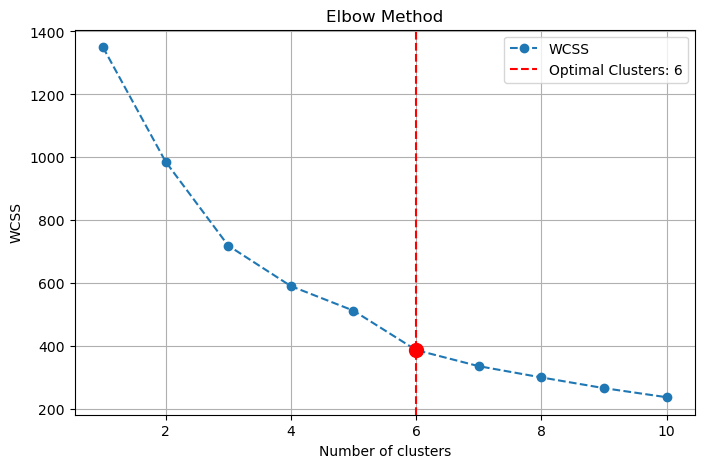

The optimal number of clusters is: 6


In [ ]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [ ]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster
0,Afghanistan,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,2872296,Europe,273870,3492,95349,1216,1.275058,3
2,Algeria,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,77481,Europe,40024,153,516565,1975,0.382271,1
4,Angola,34654212,Africa,99194,1900,2862,55,1.915438,0


C:\Users\lyn\AppData\Local\Temp\ipykernel_12272\971665484.py:4: UserWarning:


The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.



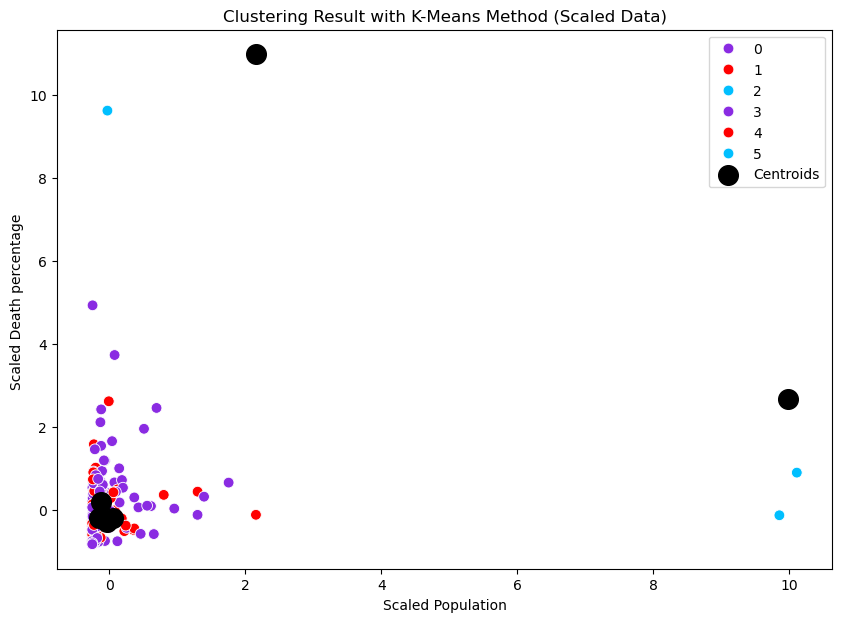

In [ ]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Population", y = "Death percentage", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Population")
plt.ylabel("Scaled Death percentage ")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

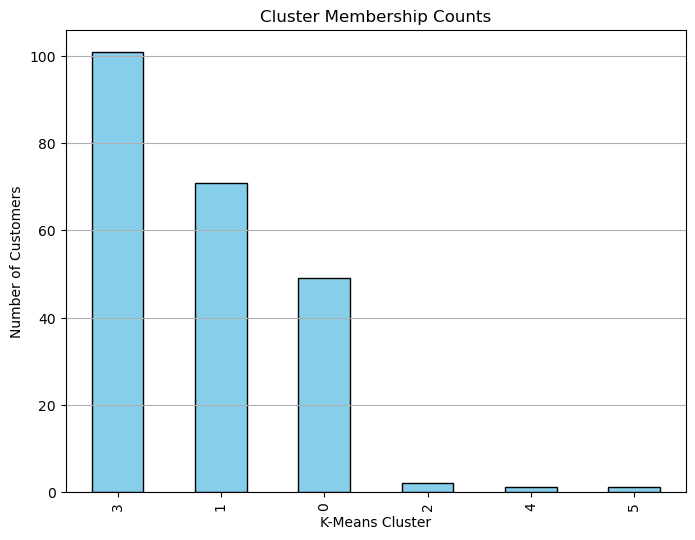

In [ ]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


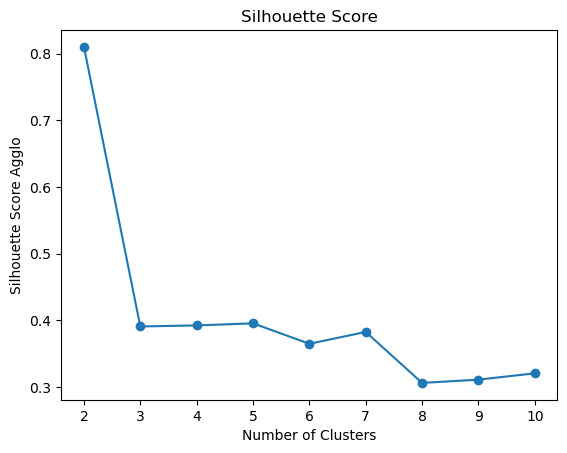

In [ ]:
## AGGLO

# this is way to show only 1 sillhouette score (turns out its the same, the best and ward linkage)
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score Agglo")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


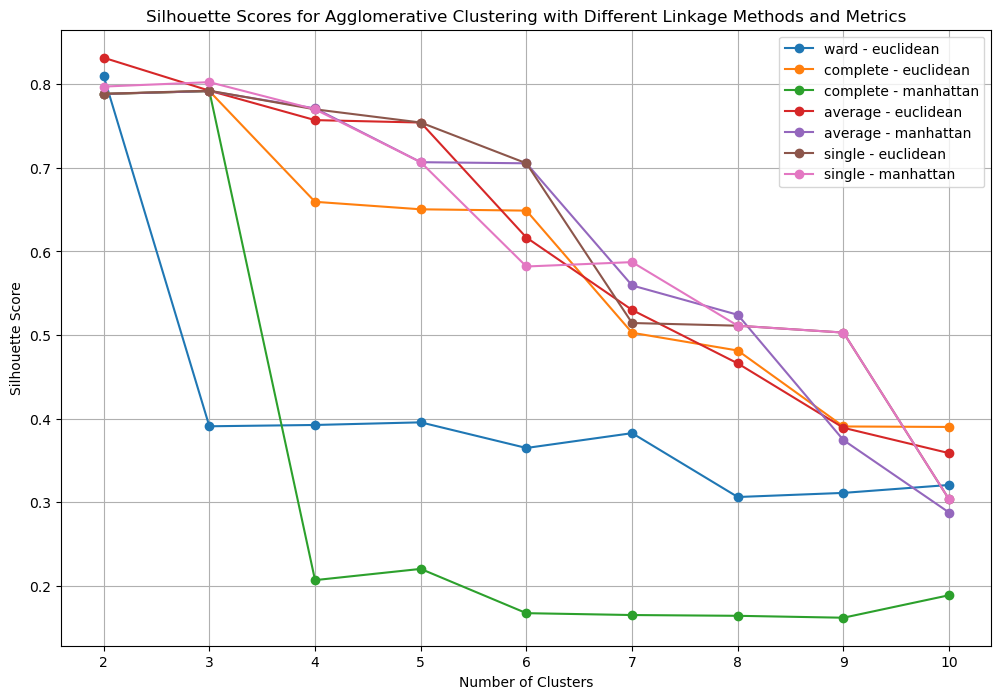

Best Silhouette Score: 0.8318263727111447
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [ ]:
# AGGLOMERATIVE

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

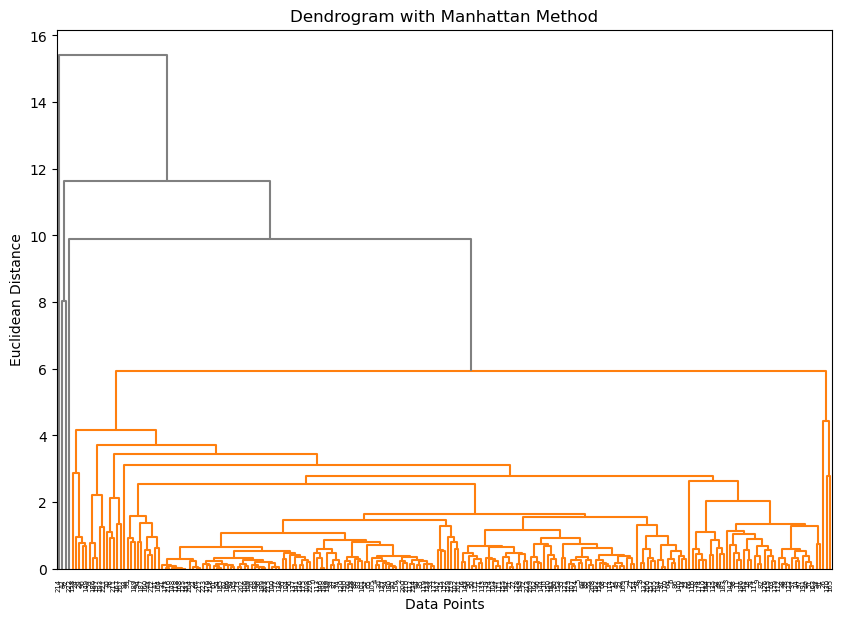

In [ ]:
# Complete Method
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Manhattan Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [ ]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.8318263727111447


In [ ]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster,Agglo
0,Afghanistan,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,2872296,Europe,273870,3492,95349,1216,1.275058,3,0
2,Algeria,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,77481,Europe,40024,153,516565,1975,0.382271,1,0
4,Angola,34654212,Africa,99194,1900,2862,55,1.915438,0,0


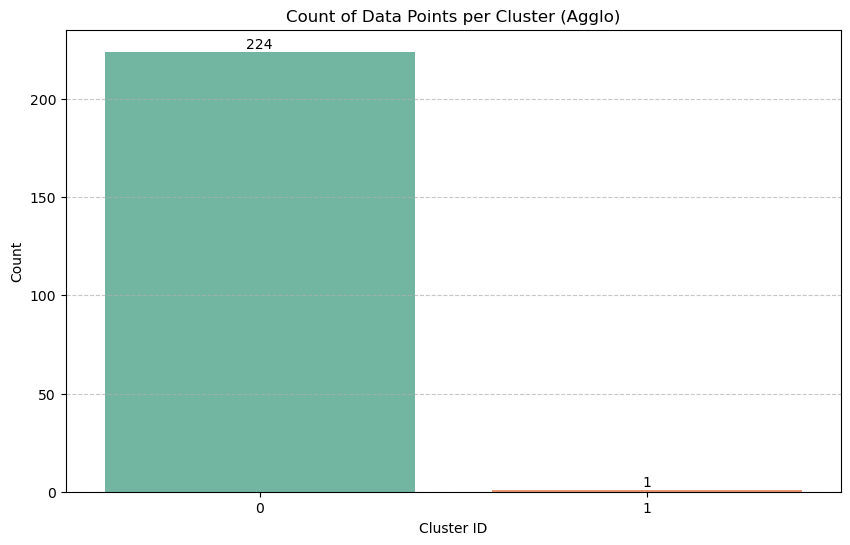

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

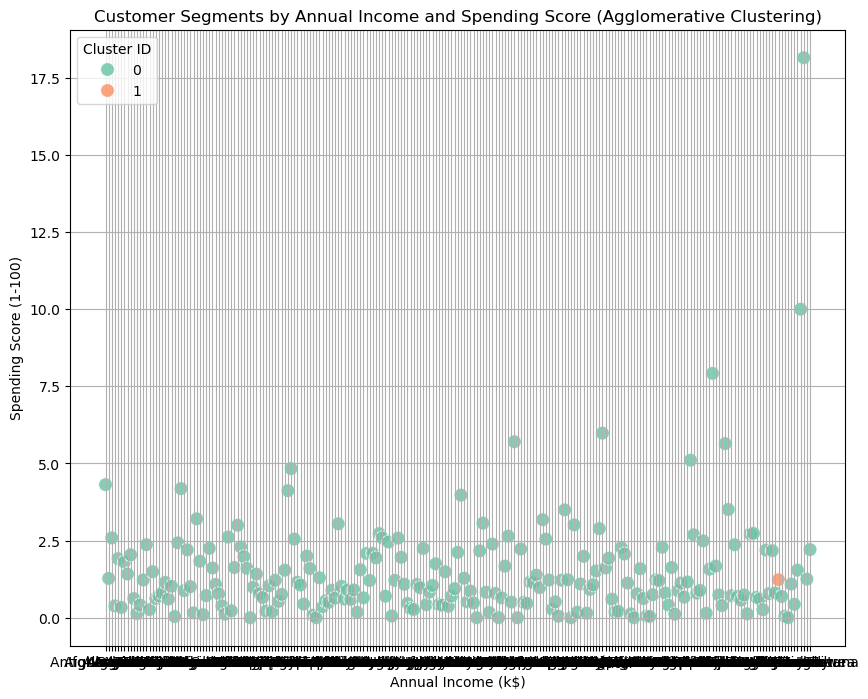

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Country', y='Death percentage', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

### Cluster Summaries

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

# ==== DATA (PASTIKAN UDAH SCALE) ====
X = df_scaled  # dataframe numerical sudah distandardize

# ==== K-MEANS ====
k = 3  # ubah sesuai elbow
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
sil_kmeans = silhouette_score(X, kmeans_labels)

print("Silhouette Score K-Means:", sil_kmeans)

# ==== AGGLOMERATIVE ====
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg.fit_predict(X)
sil_agg = silhouette_score(X, agg_labels)

print("Silhouette Score Agglomerative:", sil_agg)


Silhouette Score K-Means: 0.3825805344277662
Silhouette Score Agglomerative: 0.8099290541509596


c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [ ]:
df_results = df_scaled.copy()   # copy dataframe original
df_results['kmeans_cluster'] = kmeans_labels
df_results['agg_cluster'] = agg_labels
    
df_results.groupby('kmeans_cluster').mean()
df_results.groupby('agg_cluster').mean()


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,kmeans_cluster
agg_cluster,,,,,,,
0,-0.09961,-0.073507,-0.06765,0.004208,-0.000373,-0.002874,0.409910
1,7.37113,5.439511,5.00607,-0.311382,0.027619,0.212641,1.333333


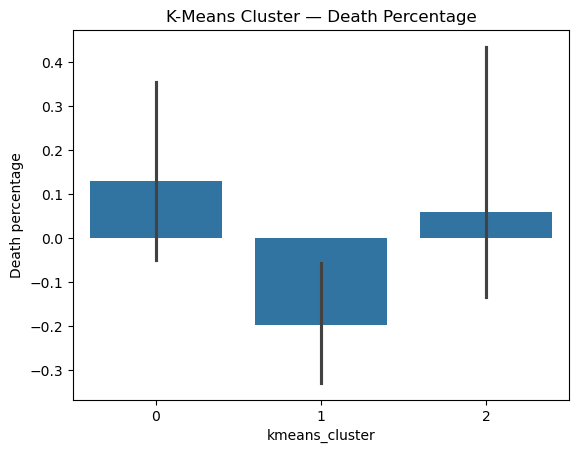

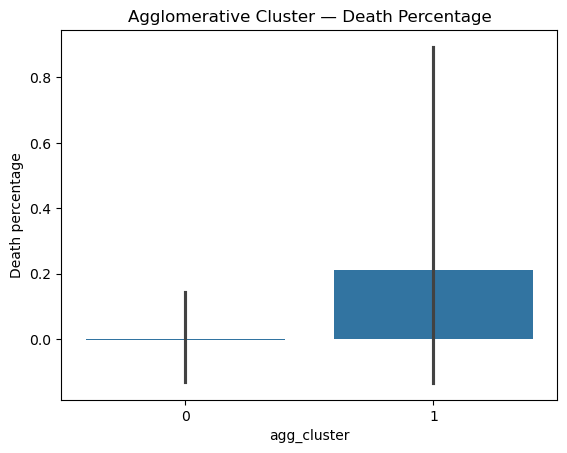

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df_results,
    x="kmeans_cluster",
    y="Death percentage"
)
plt.title("K-Means Cluster — Death Percentage")
plt.show()

sns.barplot(
    data=df_results,
    x="agg_cluster",
    y="Death percentage"
)
plt.title("Agglomerative Cluster — Death Percentage")
plt.show()


In [ ]:
df_results = df_results.merge(
    data[['Country', 'ISO 3166-1 alpha-3 CODE', 'Continent']],
    left_index=True,
    right_index=True
)

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df_results,
    locations="ISO 3166-1 alpha-3 CODE",
    color="kmeans_cluster",
    projection="natural earth"
)
fig.show()

fig = px.choropleth(
    df_results,
    locations="ISO 3166-1 alpha-3 CODE",
    color="agg_cluster",
    projection="natural earth"
)
fig.show()


In [ ]:
num_cols = df.select_dtypes(include='number').columns

In [ ]:
df.columns

Index(['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths',
       'Tot Cases//1M pop', 'Tot Deaths/1M pop', 'Death percentage',
       'KMeans_Cluster', 'Agglo'],
      dtype='object')

In [ ]:
num_cols = [
    'Population', 'Total Cases', 'Total Deaths',
     'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage'
]
    
profile_kmeans = (
    df[num_cols + ['KMeans_Cluster']]
    .groupby('KMeans_Cluster')
    .mean()
)

profile_agglo = (
    df[num_cols + ['Agglo']]
    .groupby('Agglo')
    .mean()
)

profile_kmeans, profile_agglo


(                  Population   Total Cases  Total Deaths  Tot Cases//1M pop  \
 KMeans_Cluster                                                                
 0               4.207363e+07  8.017260e+05  2.260473e+04       22451.510204   
 1               1.702493e+07  3.571558e+06  4.390906e+04      297948.014085   
 2               1.421539e+09  2.159189e+07  2.630130e+05       15380.500000   
 3               1.398653e+07  7.294655e+05  4.101614e+03       81903.712871   
 4               3.344006e+08  8.183905e+07  1.008222e+06      244734.000000   
 5               3.097526e+07  1.180600e+04  2.143000e+03         381.000000   
 
                 Tot Deaths/1M pop  Death percentage  
 KMeans_Cluster                                       
 0                      592.836735          2.996742  
 1                     2348.633803          1.086733  
 2                      187.000000          2.104518  
 3                      470.306931          0.765712  
 4                     3015.

From the profiles, each cluster basically represents a different covid situation level. Some clusters are made up of countries with super high cases and deaths per million, showing severe outbreaks, while others have moderate numbers or even weirdly low death rates that hint at underreporting. You can clearly see which groups deal with heavy transmission (big populations + high cases) versus those that look stable but actually have suspiciously low testing or incomplete reporting.

Government Policy Recommendations

Based on those patterns, the high clusters should focus on boosting hospital capacity, tightening mobility rules, and improving vaccination/ testing coverage. Meanwhile, clusters with low deaths per million but relatively high cases should invest in better reporting systems and transparency. And for the stable-looking clusters, governments can focus on maintaining surveillance, keeping vaccines updated, and preventing sudden spikes. Basically, each cluster gets a different “action plan” because their risk levels are not the same.

Model Comparison & Best Model

When comparing the models, the difference is pretty obvious: k means gives a silhouette score around 0.38, which means the clusters overlap and aren’t very clean. Agglomerative hits around 0.81, meaning the groups are way more defined and consistent. The interpretation is also smoother, the agglo clusters actually make sense and are easier to explain in real-world terms. So overall, agglomerative is the better model: it separates countries more logically, produces clearer insights, and leads to more realistic policy recommendations.